### aim: compare era and ukesm performance

### date: 

In [41]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [42]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [43]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [44]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
test_csize = tmesh.csize[0:37,:].values
print(np.shape(test_csize))
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
test_csize = tmesh.csize[0:37,:].values
tweights = np.ravel(test_csize)

(37, 182)


In [45]:
w = nc.Dataset('../UTILS/sector_landmask.nc')  
sectormask = (w['sectormask'][:])
sm_so = sectormask[0:37,:]

tdir = './averaged_forcing/MetOffice/'
yrs = np.arange(1950,2021,1)
yrlen = (len(yrs))

MO_monthly_byreg_uvel = np.zeros([yrlen,12,4])
MO_monthly_byreg_wspd = np.zeros([yrlen,12,4])
tweights = np.ravel(test_csize)

for i in range(0,yrlen):
    yr = yrs[i]
    w = nc.Dataset(f'{tdir}MetOffice_MONTHLY_SO_wind{yr}.nc')
    uwind = w['uwind10m'][:] 
    wspd = w['wspd10m'][:]
    
    for m in range(0,12):
        for s in range(1,5):
            tuwind = uwind[m,:,:]
            twspd = wspd[m,:,:]
            if s == 1:
                MO_monthly_byreg_uvel[i,m,s-1] = np.nanmean(tuwind[sm_so>1])
                twspd[np.isnan(twspd)] = 0
                twspd_mean, sumw = np.ma.average(np.ravel(twspd), weights=list(tweights), returned=True)
                MO_monthly_byreg_wspd[i,m,s-1] = twspd_mean
                
            else:
                MO_monthly_byreg_uvel[i,m,s-1] = np.nanmean(tuwind[sm_so==s])
                MO_monthly_byreg_wspd[i,m,s-1] = np.nanmean(twspd[sm_so==s])
                

tdir = './averaged_forcing/ERA5/'
yrs = np.arange(1950,2021,1)
yrlen = (len(yrs))

ERA5_monthly_byreg_uvel = np.zeros([yrlen,12,4])
ERA5_monthly_byreg_wspd = np.zeros([yrlen,12,4])

for i in range(0,yrlen):
    yr = yrs[i]
    w = nc.Dataset(f'{tdir}ERA5_MONTHLY_SO_wind{yr}.nc')
    uwind = w['uwind10m'][:] 
    wspd = w['wspd10m'][:]
    
    for m in range(0,12):
        for s in range(1,5):
            tuwind = uwind[m,:,:]
            twspd = wspd[m,:,:]
            if s == 1:
                ERA5_monthly_byreg_uvel[i,m,s-1] = np.nanmean(tuwind[sm_so>1])
                twspd[np.isnan(twspd)] = 0
                twspd_mean, sumw = np.ma.average(np.ravel(twspd), weights=list(tweights), returned=True)
                ERA5_monthly_byreg_wspd[i,m,s-1] = twspd_mean
                
            else:
                ERA5_monthly_byreg_uvel[i,m,s-1] = np.nanmean(tuwind[sm_so==s])
                ERA5_monthly_byreg_wspd[i,m,s-1] = np.nanmean(twspd[sm_so==s])

In [46]:
 
MO_austral_spring_wspd = (MO_monthly_byreg_wspd[:,8,:]*30 + MO_monthly_byreg_wspd[:,9,:]*31+ MO_monthly_byreg_wspd[:,10,:]*30)/(91)
ERA5_austral_spring_wspd = (ERA5_monthly_byreg_wspd[:,8,:]*30 + ERA5_monthly_byreg_wspd[:,9,:]*31 + ERA5_monthly_byreg_wspd[:,10,:]*30)/(91)

MO_austral_summer_wspd = (MO_monthly_byreg_wspd[:,0,:]*31 + MO_monthly_byreg_wspd[:,1,:]*28 + MO_monthly_byreg_wspd[:,11,:]*31)/(90)
ERA5_austral_summer_wspd = (ERA5_monthly_byreg_wspd[:,0,:]*31 + ERA5_monthly_byreg_wspd[:,1,:]*28 + ERA5_monthly_byreg_wspd[:,11,:]*31)/(90)

MO_austral_autumn_wspd = (MO_monthly_byreg_wspd[:,2,:]*31 + MO_monthly_byreg_wspd[:,3,:]*30 + MO_monthly_byreg_wspd[:,4,:]*31)/(92)
ERA5_austral_autumn_wspd = (ERA5_monthly_byreg_wspd[:,2,:]*31 + ERA5_monthly_byreg_wspd[:,3,:]*30 + ERA5_monthly_byreg_wspd[:,4,:]*31)/(92)

ERA5_austral_winter_wspd = (ERA5_monthly_byreg_wspd[:,6,:]*31 + ERA5_monthly_byreg_wspd[:,7,:]*31 + ERA5_monthly_byreg_wspd[:,5,:]*30)/(92)
MO_austral_winter_wspd = (MO_monthly_byreg_wspd[:,6,:]*31 + MO_monthly_byreg_wspd[:,7,:]*31 + MO_monthly_byreg_wspd[:,5,:]*30)/(92)

#MO_austral_spring_uvel = (MO_monthly_byreg_uvel[:,8,:]*30 + MO_monthly_byreg_uvel[:,9,:] + MO_monthly_byreg_uvel[:,10,:])/3
#NCEP_austral_spring_wspd = (NCEP_monthly_byreg_wspd[:,8,:] + NCEP_monthly_byreg_wspd[:,9,:] + NCEP_monthly_byreg_wspd[:,10,:])/3
#ERA5_austral_spring_uvel = (ERA5_monthly_byreg_uvel[:,8,:] + ERA5_monthly_byreg_uvel[:,9,:] + ERA5_monthly_byreg_uvel[:,10,:])/3
#MO_austral_summer_uvel = (MO_monthly_byreg_uvel[:,0,:] + MO_monthly_byreg_uvel[:,1,:] + MO_monthly_byreg_uvel[:,11,:])/3
#NCEP_austral_summer_wspd = (NCEP_monthly_byreg_wspd[:,0,:] + NCEP_monthly_byreg_wspd[:,1,:] + NCEP_monthly_byreg_wspd[:,11,:])/3
#ERA5_austral_summer_uvel = (ERA5_monthly_byreg_uvel[:,0,:] + ERA5_monthly_byreg_uvel[:,1,:] + ERA5_monthly_byreg_uvel[:,11,:])/3
#MO_austral_autumn_uvel = (MO_monthly_byreg_uvel[:,2,:] + MO_monthly_byreg_uvel[:,3,:] + MO_monthly_byreg_uvel[:,4,:])/3
#NCEP_austral_autumn_wspd = (NCEP_monthly_byreg_wspd[:,2,:] + NCEP_monthly_byreg_wspd[:,3,:] + NCEP_monthly_byreg_wspd[:,4,:])/3
#ERA5_austral_autumn_uvel = (ERA5_monthly_byreg_uvel[:,2,:] + ERA5_monthly_byreg_uvel[:,3,:] + ERA5_monthly_byreg_uvel[:,4,:])/3
#MO_austral_winter_uvel = (MO_monthly_byreg_uvel[:,6,:] + MO_monthly_byreg_uvel[:,7,:] + MO_monthly_byreg_uvel[:,5,:])/3
#NCEP_austral_winter_wspd = (NCEP_monthly_byreg_wspd[:,6,:] + NCEP_monthly_byreg_wspd[:,7,:] + NCEP_monthly_byreg_wspd[:,5,:])/3
#ERA5_austral_winter_uvel = (ERA5_monthly_byreg_uvel[:,6,:] + ERA5_monthly_byreg_uvel[:,7,:] + ERA5_monthly_byreg_uvel[:,5,:])/3




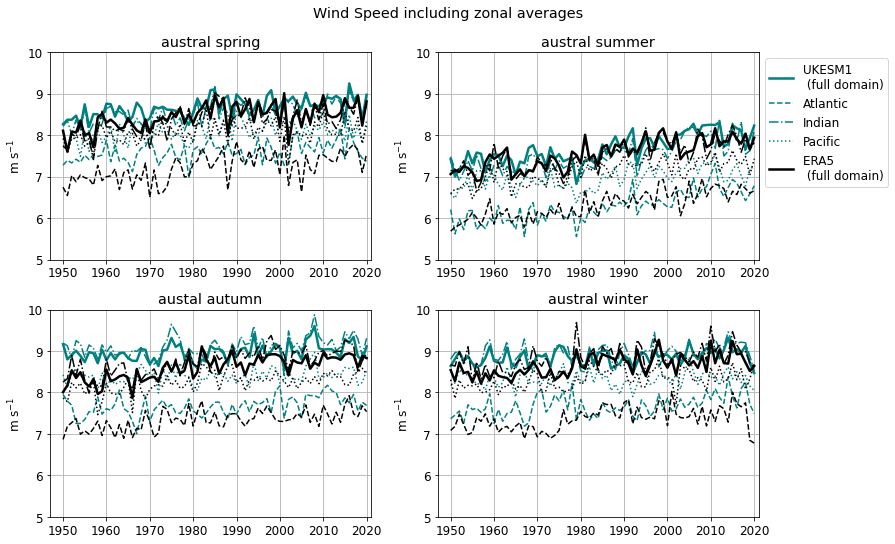

In [47]:
fact = 0.7
fig, axs = plt.subplots(2,2, figsize=(18*fact, 11*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

lw = 2.5
##spring
axs[0].plot(yrs,MO_austral_spring_wspd[:,0], linewidth = lw, color = 'teal', label = 'UKESM1 \n (full domain)')
axs[0].plot(yrs, MO_austral_spring_wspd[:,1], color = 'teal', linestyle = '--', label = 'Atlantic')
axs[0].plot(yrs,MO_austral_spring_wspd[:,2], color = 'teal', linestyle = '-.', label = 'Indian')
axs[0].plot(yrs,MO_austral_spring_wspd[:,3], color = 'teal', linestyle = ':', label = 'Pacific')

axs[0].plot(yrs,ERA5_austral_spring_wspd[:,0], linewidth = lw, color = 'black', label = 'ERA5')
axs[0].plot(yrs,ERA5_austral_spring_wspd[:,1], color = 'black', linestyle = '--')
axs[0].plot(yrs,ERA5_austral_spring_wspd[:,2], color = 'black', linestyle = '-.')
axs[0].plot(yrs,ERA5_austral_spring_wspd[:,3], color = 'black', linestyle = ':')

##summer
axs[1].plot(yrs,MO_austral_summer_wspd[:,0], linewidth = lw, color = 'teal', label = 'UKESM1 \n (full domain)')
axs[1].plot(yrs, MO_austral_summer_wspd[:,1], color = 'teal', linestyle = '--', label = 'Atlantic')
axs[1].plot(yrs,MO_austral_summer_wspd[:,2], color = 'teal', linestyle = '-.', label = 'Indian')
axs[1].plot(yrs,MO_austral_summer_wspd[:,3], color = 'teal', linestyle = ':', label = 'Pacific')

axs[1].plot(yrs,ERA5_austral_summer_wspd[:,0], linewidth = lw, color = 'black', label = 'ERA5 \n (full domain)')
axs[1].plot(yrs,ERA5_austral_summer_wspd[:,1], color = 'black', linestyle = '--')
axs[1].plot(yrs,ERA5_austral_summer_wspd[:,2], color = 'black', linestyle = '-.')
axs[1].plot(yrs,ERA5_austral_summer_wspd[:,3], color = 'black', linestyle = ':')


##autumn
axs[2].plot(yrs,MO_austral_autumn_wspd[:,0], linewidth = lw, color = 'teal', label = 'MetOffice withOzone')
axs[2].plot(yrs, MO_austral_autumn_wspd[:,1], color = 'teal', linestyle = '--', label = 'atl')
axs[2].plot(yrs,MO_austral_autumn_wspd[:,2], color = 'teal', linestyle = '-.', label = 'ind')
axs[2].plot(yrs,MO_austral_autumn_wspd[:,3], color = 'teal', linestyle = ':', label = 'pac')

axs[2].plot(yrs,ERA5_austral_autumn_wspd[:,0], linewidth = lw, color = 'black', label = 'ERA5full')
axs[2].plot(yrs,ERA5_austral_autumn_wspd[:,1], color = 'black', linestyle = '--', label = 'atl')
axs[2].plot(yrs,ERA5_austral_autumn_wspd[:,2], color = 'black', linestyle = '-.', label = 'ind')
axs[2].plot(yrs,ERA5_austral_autumn_wspd[:,3], color = 'black', linestyle = ':', label = 'pac')

##winter
axs[3].plot(yrs,MO_austral_winter_wspd[:,0], linewidth = lw, color = 'teal', label = 'MetOffice withOzone')
axs[3].plot(yrs, MO_austral_winter_wspd[:,1], color = 'teal', linestyle = '--', label = 'atl')
axs[3].plot(yrs,MO_austral_winter_wspd[:,2], color = 'teal', linestyle = '-.', label = 'ind')
axs[3].plot(yrs,MO_austral_winter_wspd[:,3], color = 'teal', linestyle = ':', label = 'pac')

axs[3].plot(yrs,ERA5_austral_winter_wspd[:,0], linewidth = lw, color = 'black', label = 'ERA5full')
axs[3].plot(yrs,ERA5_austral_winter_wspd[:,1], color = 'black', linestyle = '--', label = 'atl')
axs[3].plot(yrs,ERA5_austral_winter_wspd[:,2], color = 'black', linestyle = '-.', label = 'ind')
axs[3].plot(yrs,ERA5_austral_winter_wspd[:,3], color = 'black', linestyle = ':', label = 'pac')


tits = ['austral spring', 'austral summer', \
       'austal autumn', 'austral winter']

for p in range(0,4):
    axs[p].grid(); axs[p].set_xlim([1947,2021])
    axs[p].set_xticks(np.arange(1950,2030,10), fontsize = 10)
    axs[p].set_ylabel('m s$^{-1}$')
    axs[p].set_ylim([5,10])
    axs[p].set_title(tits[p])
    
    axs[1].legend(bbox_to_anchor = [1, 1])
        
plt.suptitle('Wind Speed including zonal averages')
plt.tight_layout()

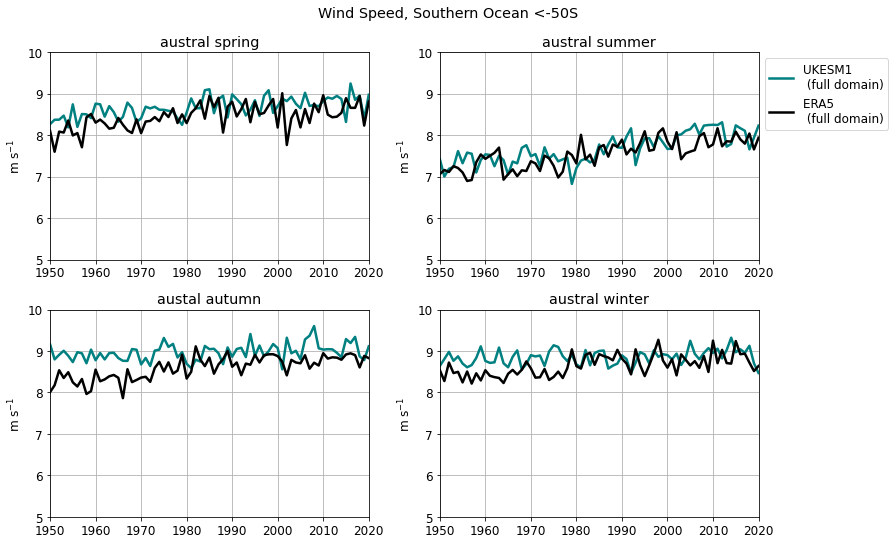

In [48]:
fact = 0.7
fig, axs = plt.subplots(2,2, figsize=(18*fact, 11*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

lw = 2.5
##spring
axs[0].plot(yrs,MO_austral_spring_wspd[:,0], linewidth = lw, color = 'teal', label = 'UKESM1 \n (full domain)')
# axs[0].plot(yrs, MO_austral_spring_wspd[:,1], color = 'teal', linestyle = '--', label = 'Atlantic')
# axs[0].plot(yrs,MO_austral_spring_wspd[:,2], color = 'teal', linestyle = '-.', label = 'Indian')
# axs[0].plot(yrs,MO_austral_spring_wspd[:,3], color = 'teal', linestyle = ':', label = 'Pacific')

axs[0].plot(yrs,ERA5_austral_spring_wspd[:,0], linewidth = lw, color = 'black', label = 'ERA5')
# axs[0].plot(yrs,ERA5_austral_spring_wspd[:,1], color = 'black', linestyle = '--')
# axs[0].plot(yrs,ERA5_austral_spring_wspd[:,2], color = 'black', linestyle = '-.')
# axs[0].plot(yrs,ERA5_austral_spring_wspd[:,3], color = 'black', linestyle = ':')

##summer
axs[1].plot(yrs,MO_austral_summer_wspd[:,0], linewidth = lw, color = 'teal', label = 'UKESM1 \n (full domain)')
# axs[1].plot(yrs, MO_austral_summer_wspd[:,1], color = 'teal', linestyle = '--', label = 'Atlantic')
# axs[1].plot(yrs,MO_austral_summer_wspd[:,2], color = 'teal', linestyle = '-.', label = 'Indian')
# axs[1].plot(yrs,MO_austral_summer_wspd[:,3], color = 'teal', linestyle = ':', label = 'Pacific')

axs[1].plot(yrs,ERA5_austral_summer_wspd[:,0], linewidth = lw, color = 'black', label = 'ERA5 \n (full domain)')
# axs[1].plot(yrs,ERA5_austral_summer_wspd[:,1], color = 'black', linestyle = '--')
# axs[1].plot(yrs,ERA5_austral_summer_wspd[:,2], color = 'black', linestyle = '-.')
# axs[1].plot(yrs,ERA5_austral_summer_wspd[:,3], color = 'black', linestyle = ':')


##autumn
axs[2].plot(yrs,MO_austral_autumn_wspd[:,0], linewidth = lw, color = 'teal', label = 'MetOffice withOzone')
# axs[2].plot(yrs, MO_austral_autumn_wspd[:,1], color = 'teal', linestyle = '--', label = 'atl')
# axs[2].plot(yrs,MO_austral_autumn_wspd[:,2], color = 'teal', linestyle = '-.', label = 'ind')
# axs[2].plot(yrs,MO_austral_autumn_wspd[:,3], color = 'teal', linestyle = ':', label = 'pac')

axs[2].plot(yrs,ERA5_austral_autumn_wspd[:,0], linewidth = lw, color = 'black', label = 'ERA5full')
# axs[2].plot(yrs,ERA5_austral_autumn_wspd[:,1], color = 'black', linestyle = '--', label = 'atl')
# axs[2].plot(yrs,ERA5_austral_autumn_wspd[:,2], color = 'black', linestyle = '-.', label = 'ind')
# axs[2].plot(yrs,ERA5_austral_autumn_wspd[:,3], color = 'black', linestyle = ':', label = 'pac')

##winter
axs[3].plot(yrs,MO_austral_winter_wspd[:,0], linewidth = lw, color = 'teal', label = 'MetOffice withOzone')
# axs[3].plot(yrs, MO_austral_winter_wspd[:,1], color = 'teal', linestyle = '--', label = 'atl')
# axs[3].plot(yrs,MO_austral_winter_wspd[:,2], color = 'teal', linestyle = '-.', label = 'ind')
# axs[3].plot(yrs,MO_austral_winter_wspd[:,3], color = 'teal', linestyle = ':', label = 'pac')

axs[3].plot(yrs,ERA5_austral_winter_wspd[:,0], linewidth = lw, color = 'black', label = 'ERA5full')
# axs[3].plot(yrs,ERA5_austral_winter_wspd[:,1], color = 'black', linestyle = '--', label = 'atl')
# axs[3].plot(yrs,ERA5_austral_winter_wspd[:,2], color = 'black', linestyle = '-.', label = 'ind')
# axs[3].plot(yrs,ERA5_austral_winter_wspd[:,3], color = 'black', linestyle = ':', label = 'pac')


tits = ['austral spring', 'austral summer', \
       'austal autumn', 'austral winter']

for p in range(0,4):
    axs[p].grid(); axs[p].set_xlim([1950,2020])
    axs[p].set_xticks(np.arange(1950,2030,10), fontsize = 10)
    axs[p].set_ylabel('m s$^{-1}$')
    axs[p].set_ylim([5,10])
    axs[p].set_title(tits[p])
    
    axs[1].legend(bbox_to_anchor = [1, 1])
        
plt.suptitle('Wind Speed, Southern Ocean <-50S')
plt.tight_layout()

note the two methods of calculating weighted avg differ by about 1%, maybe due to masking. niggling but not crucial

In [49]:
def weighted_quantile(values, quantiles, sample_weight=None, 
                      values_sorted=False, old_style=False):
    """ Very close to numpy.percentile, but supports weights.
    NOTE: quantiles should be in [0, 1]!
    :param values: numpy.array with data
    :param quantiles: array-like with many quantiles needed
    :param sample_weight: array-like of the same length as `array`
    :param values_sorted: bool, if True, then will avoid sorting of
        initial array
    :param old_style: if True, will correct output to be consistent
        with numpy.percentile.
    :return: numpy.array with computed quantiles.
    """
    values = np.array(values)
    quantiles = np.array(quantiles)
    if sample_weight is None:
        sample_weight = np.ones(len(values))
    sample_weight = np.array(sample_weight)
    assert np.all(quantiles >= 0) and np.all(quantiles <= 1), \
        'quantiles should be in [0, 1]'

    if not values_sorted:
        sorter = np.argsort(values)
        values = values[sorter]
        sample_weight = sample_weight[sorter]

    weighted_quantiles = np.cumsum(sample_weight) - 0.5 * sample_weight
    if old_style:
        # To be convenient with numpy.percentile
        weighted_quantiles -= weighted_quantiles[0]
        weighted_quantiles /= weighted_quantiles[-1]
    else:
        weighted_quantiles /= np.sum(sample_weight)
    return np.interp(quantiles, weighted_quantiles, values)


def get_means(scen):
    tw = f'/gpfs/home/mep22dku/scratch/SOZONE/MO_pipeline/EXTRACT/ncs/scen_{scen}_monthly_wspd.nc'
    tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
    test_csize = tmesh.csize[0:37,:].values
    tweights = np.ravel(test_csize)
    q = xr.open_dataset(tw)
    tscen = np.zeros([2,161])
    for i in range(0,161):
        test_wspd = (q.mean_wspd[i,12,0:37,:].values)
        data = np.ravel(test_wspd)

        mean, sumw = np.ma.average(data, weights=list(tweights), returned=True)
        tscen[0,i] = mean
        test_wspd = (q.mean_wspd[i,13,0:37,:].values)
        data = np.ravel(test_wspd)
        mean, sumw = np.ma.average(data, weights=list(tweights), returned=True)
        tscen[1,i] = mean

    return tscen

#open tmesh and get area weights
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
test_csize = tmesh.csize[0:37,:].values

#broadcast csize
csize_b = np.zeros([3,37,182])
for i in range(0,3):
    csize_b[i,:,:] = test_csize
    
def get_mean_and_percentile(ncnam, tp = 0.95, mos = [0,1,11]):
    
    moday = [31,28,31,30,31,30,31,31,30,31,30,31]
    '''
    mos = 3 months to subset
    '''
    # open one year
    w = xr.open_dataset(ncnam)
    twspd = (w['wspd10m'][mos,:,:])
    
    csize_timesmo = np.copy(csize_b)
    csize_timesmo[0,:,:] = csize_b[0,:,:] * moday[mos[0]]
    csize_timesmo[1,:,:] = csize_b[1,:,:] * moday[mos[1]]
    csize_timesmo[2,:,:] = csize_b[2,:,:] * moday[mos[2]]


    p95 = weighted_quantile(np.ravel(twspd), [tp], sample_weight = np.ravel(csize_timesmo))
    masked_data = np.ma.masked_array(twspd, np.isnan(twspd))
    mean, sumw = np.ma.average(masked_data, weights=list(csize_timesmo), returned=True)

    t_perc = (p95[0])
    t_mean = (mean)
    
    return t_perc, t_mean

In [50]:
len(yrs)

71

In [61]:
#djf, mam, jja, son in order, mean = 0, 75thperc = 1, 95thperc = 2
ERA_95_seas = np.zeros([71,4,3])

for i in range(1950,2021):
    ncnam = f'./averaged_forcing/ERA5/ERA5_MONTHLY_SO_wind{i}.nc'
    tperc, tmean = get_mean_and_percentile(ncnam, tp = 0.75, mos = [0,1,11]) #summer
    ERA_95_seas[i-1950,0,0] = tmean
    ERA_95_seas[i-1950,0,1] = tperc
    tperc, tmean = get_mean_and_percentile(ncnam, tp = 0.95, mos = [0,1,11])
    ERA_95_seas[i-1950,0,2] = tperc
    
    tperc, tmean = get_mean_and_percentile(ncnam, tp = 0.75, mos = [2,3,4]) #autumn
    ERA_95_seas[i-1950,1,0] = tmean
    ERA_95_seas[i-1950,1,1] = tperc
    tperc, tmean = get_mean_and_percentile(ncnam, tp = 0.95, mos = [2,3,4])
    ERA_95_seas[i-1950,1,2] = tperc   
    
    tperc, tmean = get_mean_and_percentile(ncnam, tp = 0.75, mos = [5,6,7])
    ERA_95_seas[i-1950,2,0] = tmean
    ERA_95_seas[i-1950,2,1] = tperc
    tperc, tmean = get_mean_and_percentile(ncnam, tp = 0.95, mos = [5,6,7])
    ERA_95_seas[i-1950,2,2] = tperc  
    
    tperc, tmean = get_mean_and_percentile(ncnam, tp = 0.75, mos = [8,9,10])
    ERA_95_seas[i-1950,3,0] = tmean
    ERA_95_seas[i-1950,3,1] = tperc
    tperc, tmean = get_mean_and_percentile(ncnam, tp = 0.95, mos = [8,9,10])
    ERA_95_seas[i-1950,3,2] = tperc  

UKESM_95_seas = np.zeros([71,4,3])
for i in range(1950,2021):
    ncnam = f'./averaged_forcing/MetOffice/MetOffice_MONTHLY_SO_wind{i}.nc'
    tperc, tmean = get_mean_and_percentile(ncnam, tp = 0.75, mos = [0,1,11]) #summer
    UKESM_95_seas[i-1950,0,0] = tmean
    UKESM_95_seas[i-1950,0,1] = tperc
    tperc, tmean = get_mean_and_percentile(ncnam, tp = 0.95, mos = [0,1,11])
    UKESM_95_seas[i-1950,0,2] = tperc
    
    tperc, tmean = get_mean_and_percentile(ncnam, tp = 0.75, mos = [2,3,4]) #autumn
    UKESM_95_seas[i-1950,1,0] = tmean
    UKESM_95_seas[i-1950,1,1] = tperc
    tperc, tmean = get_mean_and_percentile(ncnam, tp = 0.95, mos = [2,3,4])
    UKESM_95_seas[i-1950,1,2] = tperc   
    
    tperc, tmean = get_mean_and_percentile(ncnam, tp = 0.75, mos = [5,6,7])
    UKESM_95_seas[i-1950,2,0] = tmean
    UKESM_95_seas[i-1950,2,1] = tperc
    tperc, tmean = get_mean_and_percentile(ncnam, tp = 0.95, mos = [5,6,7])
    UKESM_95_seas[i-1950,2,2] = tperc  
    
    tperc, tmean = get_mean_and_percentile(ncnam, tp = 0.75, mos = [8,9,10])
    UKESM_95_seas[i-1950,3,0] = tmean
    UKESM_95_seas[i-1950,3,1] = tperc
    tperc, tmean = get_mean_and_percentile(ncnam, tp = 0.95, mos = [8,9,10])
    UKESM_95_seas[i-1950,3,2] = tperc  
# yrs = np.arange(1950,2021,1)
# yrlen = (len(yrs))

## plot demonstrating comparison between mean, 95th and 75th percentile of distribution of era5 and ukesm1 wind forcing

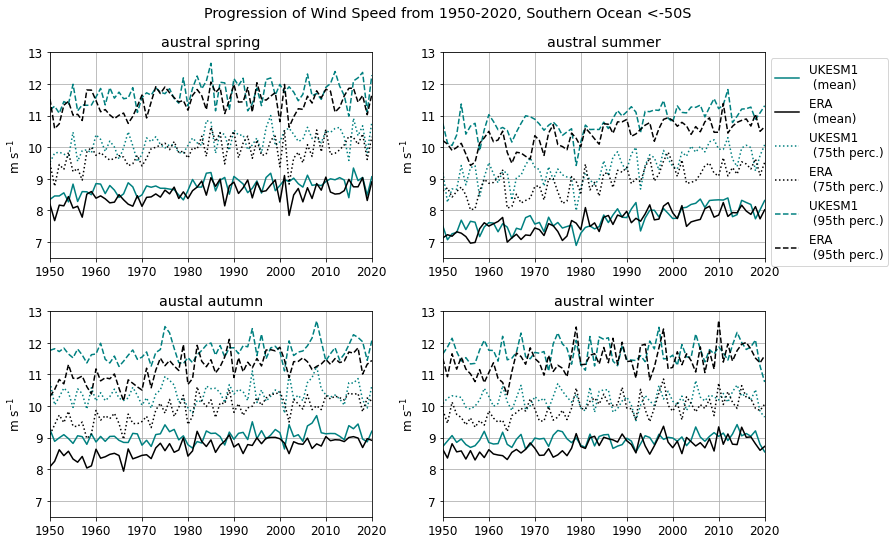

In [74]:
fact = 0.7
fig, axs = plt.subplots(2,2, figsize=(18*fact, 11*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

lw = 2.5

def plot_lines(plin, seasin):
    axs[plin].plot(yrs,UKESM_95_seas[:,seasin,0], linewidth = lw-1, color = 'teal', label = 'UKESM1 \n (mean)')
    axs[plin].plot(yrs,ERA_95_seas[:,seasin,0], linewidth = lw-1, color = 'k', label = 'ERA \n (mean)')

    #75th
    axs[plin].plot(yrs,UKESM_95_seas[:,seasin,1], linewidth = lw-1, linestyle = ':', color = 'teal', label = 'UKESM1 \n (75th perc.)')
    axs[plin].plot(yrs,ERA_95_seas[:,seasin,1], linewidth = lw-1, linestyle = ':', color = 'k', label = 'ERA \n (75th perc.)')

    #95th
    axs[plin].plot(yrs,UKESM_95_seas[:,seasin,2], linewidth = lw-1, linestyle = '--', color = 'teal', label = 'UKESM1 \n (95th perc.)')
    axs[plin].plot(yrs,ERA_95_seas[:,seasin,2], linewidth = lw-1, linestyle = '--', color = 'k', label = 'ERA \n (95th perc.)')

#spring
plin = 0; seasin = 3
plot_lines(plin, seasin)

#summer
plin = 1; seasin = 0
plot_lines(plin, seasin)

#autumn
plin = 2; seasin = 1
plot_lines(plin, seasin)

#winter
plin = 3; seasin = 2
plot_lines(plin, seasin)

tits = ['austral spring', 'austral summer', \
       'austal autumn', 'austral winter']

for p in range(0,4):
    axs[p].grid(); axs[p].set_xlim([1950,2020])
    axs[p].set_xticks(np.arange(1950,2030,10), fontsize = 10)
    axs[p].set_ylabel('m s$^{-1}$')
    axs[p].set_ylim([6.5,13])
    axs[p].set_title(tits[p])
    
    axs[1].legend(bbox_to_anchor = [1, 1])
        
plt.suptitle('Progression of Wind Speed from 1950-2020, Southern Ocean <-50S')
plt.tight_layout()

0.01